<a href="https://colab.research.google.com/github/Abiramianbarasan/Road-accident-risk-prediction-system-using-machine-learning/blob/main/Datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
accidents_df = pd.read_csv('/content/gdrive/My Drive/accident_data.csv')


In [ ]:
# Convert Date and Time columns
accidents_df["Date"] = pd.to_datetime(accidents_df["Date"])
accidents_df["Time"] = pd.to_datetime(accidents_df["Time"], format="%H:%M:%S").dt.hour

<ipython-input-7-fdda67813005>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  accidents_df["Date"] = pd.to_datetime(accidents_df["Date"])


<ipython-input-6-9272ada3feaa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Day_of_Week", data=accidents_df,order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")


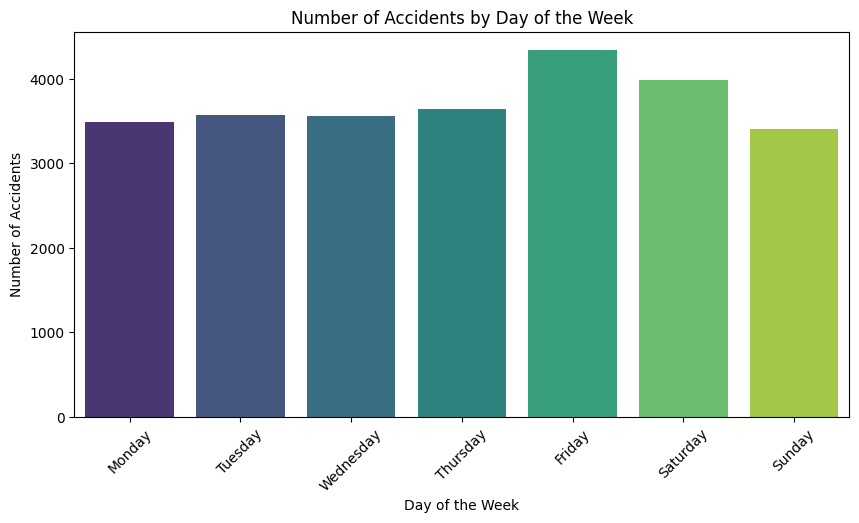

In [ ]:
# Plot accidents by day of the week
plt.figure(figsize=(10, 5))
sns.countplot(x="Day_of_Week", data=accidents_df,order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")
plt.title("Number of Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

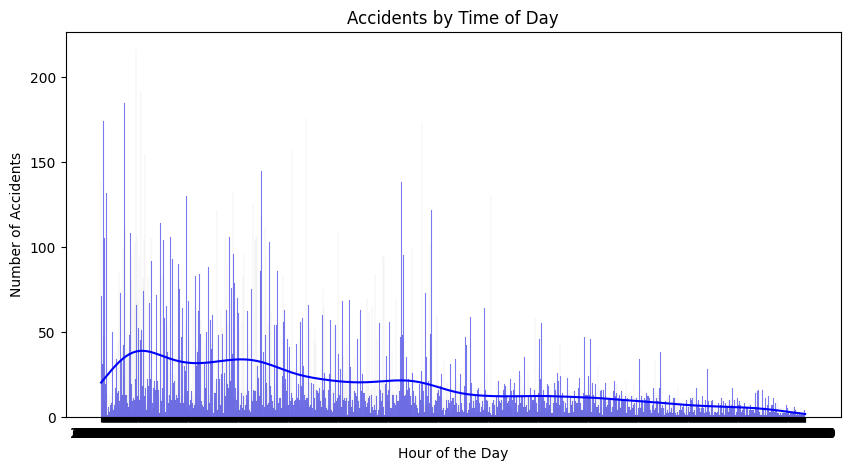

In [ ]:
# Plot accidents by time of the day
plt.figure(figsize=(10, 5))
sns.histplot(accidents_df["Time"], bins=24, kde=True, color="blue")
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.show()


<ipython-input-8-1f5abc226fe9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Accident_Severity", data=accidents_df, palette="magma")


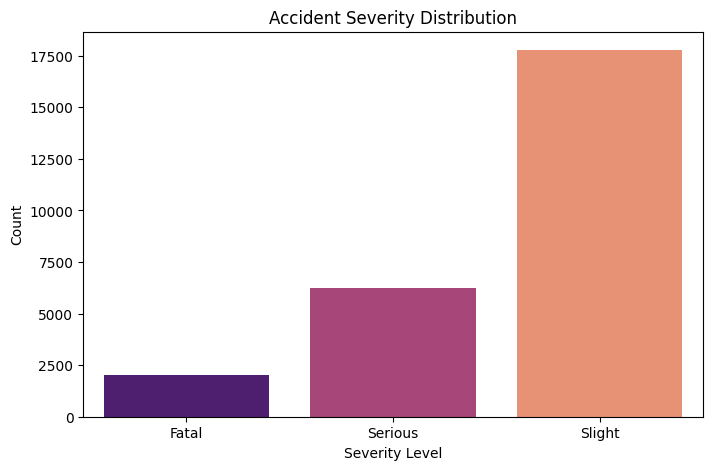

In [ ]:
# Plot accident severity distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Accident_Severity", data=accidents_df, palette="magma")
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

<ipython-input-9-e7e03523e5d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Speed_limit", y="Number_of_Casualties", data=accidents_df, palette="coolwarm")


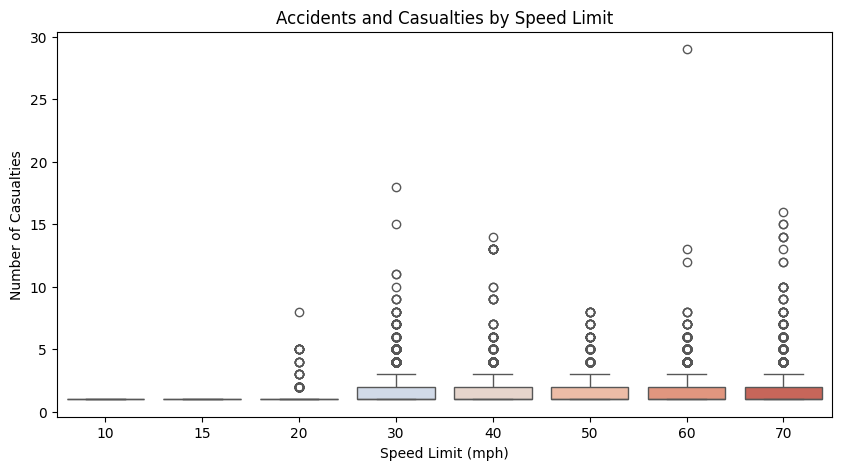

In [ ]:
# Plot accidents by speed limit
plt.figure(figsize=(10, 5))
sns.boxplot(x="Speed_limit", y="Number_of_Casualties", data=accidents_df, palette="coolwarm")
plt.title("Accidents and Casualties by Speed Limit")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Number of Casualties")
plt.show()

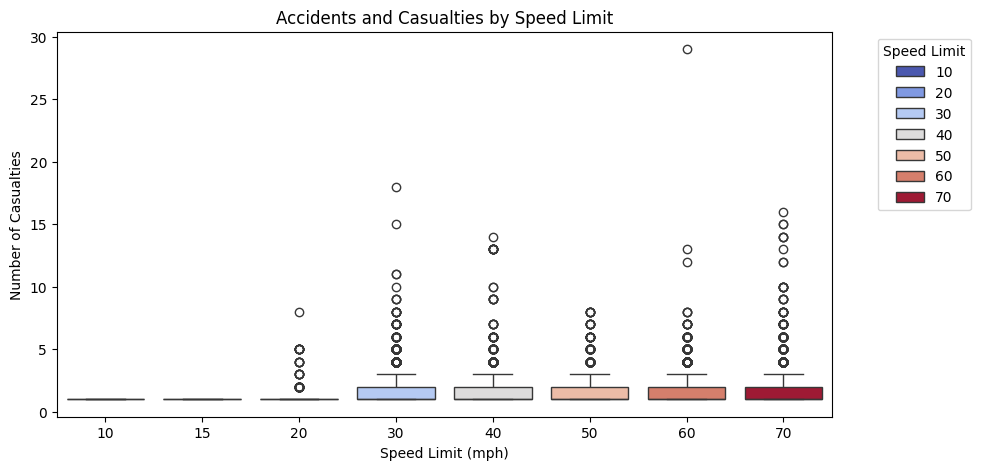

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Speed_limit", y="Number_of_Casualties", data=accidents_df,hue="Speed_limit", palette="coolwarm")  # Using hue to apply color properly
plt.title("Accidents and Casualties by Speed Limit")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Number of Casualties")
plt.legend(title="Speed Limit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-11-f051bb507a9f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Speed_limit", y="Number_of_Casualties", data=speed_casualty_avg, palette="coolwarm")


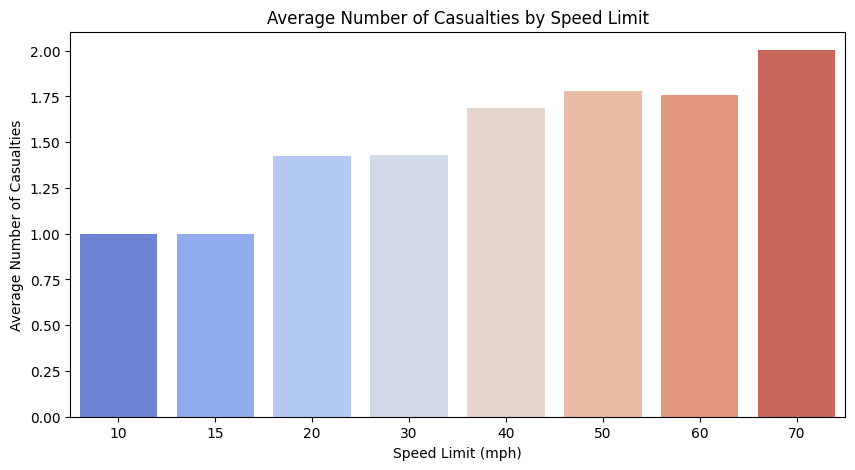

In [ ]:
plt.figure(figsize=(10, 5))
speed_casualty_avg = accidents_df.groupby("Speed_limit")["Number_of_Casualties"].mean().reset_index()
sns.barplot(x="Speed_limit", y="Number_of_Casualties", data=speed_casualty_avg, palette="coolwarm")

plt.title("Average Number of Casualties by Speed Limit")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Average Number of Casualties")
plt.show()

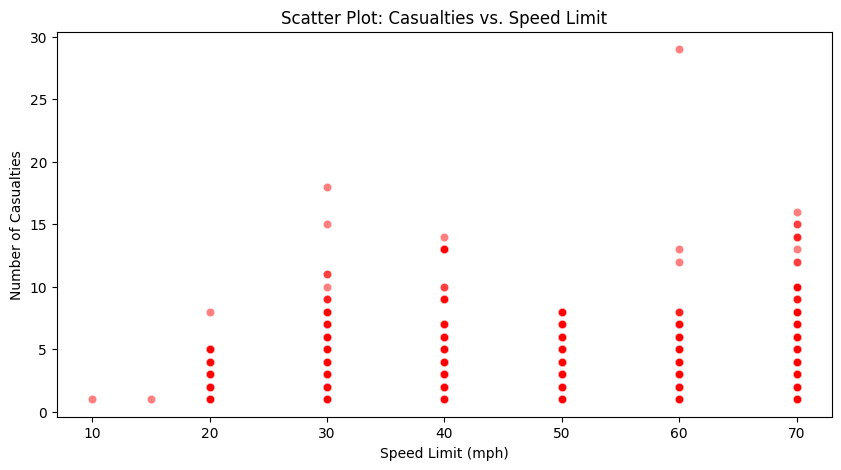

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Speed_limit", y="Number_of_Casualties", data=accidents_df, alpha=0.5, color="red")

plt.title("Scatter Plot: Casualties vs. Speed Limit")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Number of Casualties")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = accidents_df.drop(columns=['Accident_Severity'])  # Remove the target column, use accidents_df instead of accidents
# Correctly select the target variable using a list of column names
y = accidents_df[['Accident_Severity','Did_Police_Officer_Attend_Scene_of_Accident', 'Age_of_Driver', 'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the splits
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

KeyError: "['Age_of_Driver', 'Vehicle_Type', 'Age_of_Vehicle', 'Engine_Capacity_(CC)', 'Sex_of_Driver'] not in index"